In [17]:
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


viridis = cm.get_cmap('viridis', 12)
colors = viridis(np.linspace(0, 1, 12))
sns.set(style="whitegrid")

In [15]:
# for model in models_path[:-2]:
#     score = NER_MODEL(meta_data, 'test')\
#         .load_models('NER_model/'+model)\
#         .load_data()\
#         .evaluate(verbose=0)
#     score_ = score['ents_per_type']
#     score_['overall'] = {
#         'p': score['ents_p'],
#         'r': score['ents_r'],
#         'f':score['ents_f']}
#     models_score[model] = score_
    
#     with open('model_train_results.log', 'w') as f:
#         json.dump(models_score, f)

In [16]:
def get_score(model_score, key_score):
    keys = list(model_score.keys())
    p, r, f = [[], [], []]
    for key in keys:
        p_,r_,f_ = model_score[key][key_score].values()
        p.append(p_)
        r.append(r_)
        f.append(f_)
    return keys, p, r, f

models_score = json.load(open('log/model_results.log', 'r'))

In [23]:
keys, p, r, f = get_score(models_score, 'overall')
keys, p_brand, r_brand, f_brand = get_score(models_score, 'Brand')
keys, p_brand, r_brand, f_ing = get_score(models_score, 'Ing')
keys, p_brand, r_brand, f_favor = get_score(models_score, 'Flavor')

In [19]:
df = pd.DataFrame([keys, f_brand, f_ing, f_favor, f]).T
df.columns = ['model', 'Brand', 'Ing', 'Favour', 'overall']
df = df.sort_values(by='overall', ascending=False).drop('overall', axis=1)
keys = ['Brand', 'Ing', 'Favour']
df = pd.melt(df, id_vars='model', var_name='categories', value_vars=keys, value_name='f1')

/Users/than.an/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


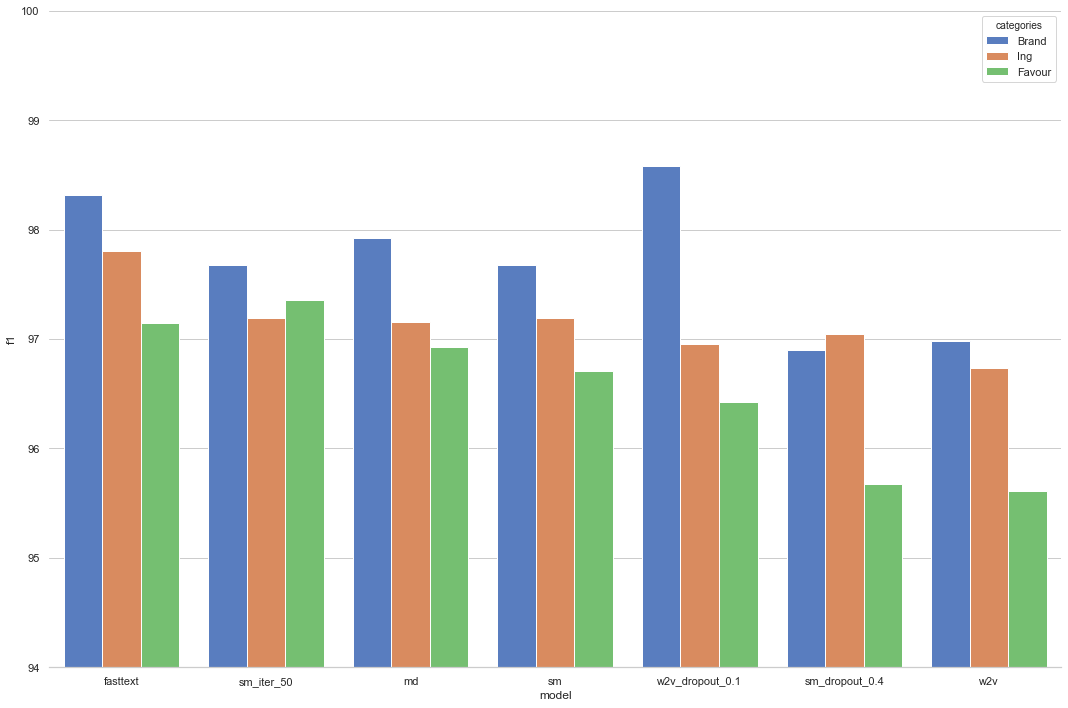

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
# Draw a nested barplot to show survival for class and sex
g = sns.barplot(ax=ax, x="model", y="f1", hue="categories", data=df, palette="muted", ci=None)
sns.despine(left=True, ax=ax, fig= fig)
ax.set_ylim(94, 100)
fig.tight_layout()
fig.show()

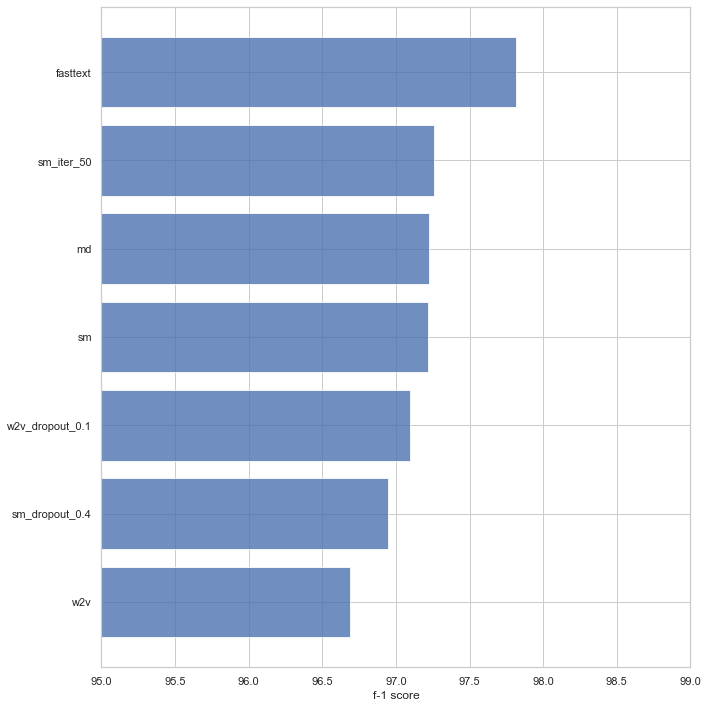

In [24]:
f_index = sorted(range(len(f)), key=lambda k: f[k])

fig = plt.figure()
bars = [keys[i] for i in f_index]
height = [f[i] for i in f_index]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, alpha=0.8)
 
# Create names on the y-axis
plt.xlabel('f-1 score')
plt.yticks(y_pos, bars)
plt.xlim(95, 99)
plt.tight_layout()

plt.show()

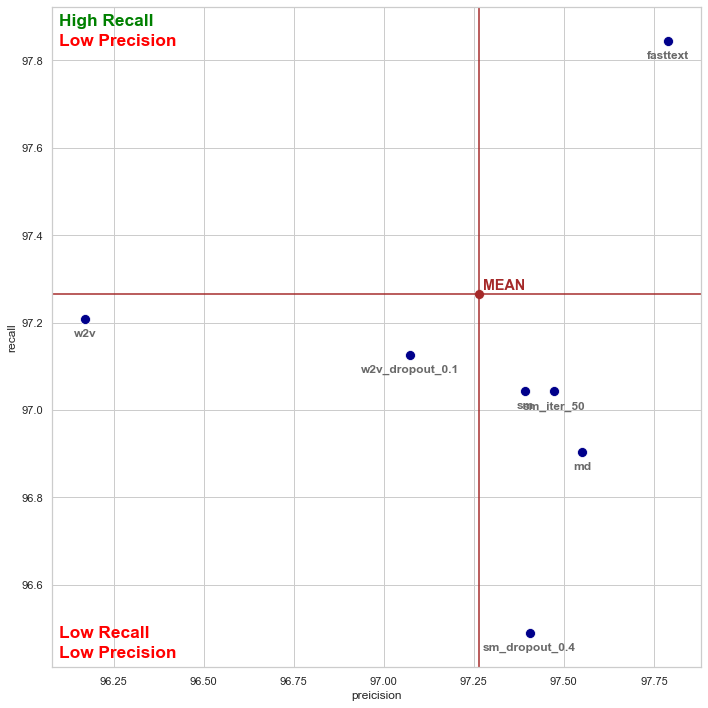

In [25]:
df = pd.DataFrame(zip(keys, p, r), columns=['models', 'preicision', 'recall'])

fig, ax = plt.subplots()
# basic plot
p1=sns.scatterplot(ax=ax,
                data=df, 
               x="preicision",
               y="recall", 
               marker="o", 
               color="darkblue", 
               s=100)

mean_x, mean_y = df.preicision.mean(), df.preicision.mean()
ax.axvline(mean_x, color='brown')
ax.axhline(mean_y, color='brown')
pl_ = sns.scatterplot(ax=ax,
                x=[mean_x],
               y=[mean_y], 
               marker="o", 
               color="brown", 
               s=100)
pl_.text(mean_x+0.01,
        mean_y+0.01, 
         'MEAN', 
         horizontalalignment='left', 
         size='large', 
         color='brown', 
         weight='semibold')

left, width = 0.01, 1
bottom, height = 0.01, 1
right = width -left
top = -bottom +height

shift = 0.03
ax.text(left, bottom, 'Low Precision',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, 
        fontsize = 'x-large',
        color='red',
        weight='semibold')
ax.text(left, bottom+shift, 'Low Recall',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, 
        fontsize = 'x-large',
        color='red',
        weight='semibold')

ax.text(left, top-shift, 'Low Precision',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes, 
        fontsize = 'x-large',
        color='red',
        weight='semibold')
ax.text(left, top, 'High Recall',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes, 
        fontsize = 'x-large',
        color='green',
        weight='semibold')

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     p1.text(df.preicision[line], 
             df.recall[line]-0.04, 
             df['models'][line], 
             horizontalalignment='center', 
             size='medium', 
             color='dimgrey', 
             weight='semibold')
 
plt.tight_layout()
plt.show()